In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [123]:
train = pd.read_csv('Churn_train.csv')
test = pd.read_csv('Churn_test.csv')

In [77]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


# Data Description and Information :

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [79]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.161874,32.277955,64.779127
std,0.368368,24.555211,30.104993
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.400000
50%,0.000000,29.000000,70.375000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.650000


**Converting inconsistent dtypes into consistent dtypes and handling missing values :**

In [80]:
train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [81]:
#Converting TotalCharges into Numeric data type
train.TotalCharges = pd.to_numeric(train.TotalCharges, errors='coerce')

In [82]:
train.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [83]:
train['TotalCharges'] = np.where(train['TotalCharges'].isna(), 
                                 train['TotalCharges'].median(skipna = True), train['TotalCharges'])

In [84]:
train_df = train

In [86]:
train_df['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
train_df['Churn'].replace(to_replace = 'No', value = 0, inplace = True)

In [87]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [88]:
train_df['gender'] = le.fit_transform(train_df['gender'])
train_df['Partner'] = le.fit_transform(train_df['Partner'])
train_df['Dependents'] = le.fit_transform(train_df['Dependents'])
train_df['PhoneService'] = le.fit_transform(train_df['PhoneService'])
train_df['MultipleLines'] = le.fit_transform(train_df['MultipleLines'])
train_df['InternetService'] = le.fit_transform(train_df['InternetService'])
train_df['OnlineSecurity'] = le.fit_transform(train_df['OnlineSecurity'])
train_df['OnlineBackup'] = le.fit_transform(train_df['OnlineBackup'])
train_df['DeviceProtection'] = le.fit_transform(train_df['DeviceProtection'])
train_df['TechSupport'] = le.fit_transform(train_df['TechSupport'])
train_df['StreamingTV'] = le.fit_transform(train_df['StreamingTV'])
train_df['StreamingMovies'] = le.fit_transform(train_df['StreamingMovies'])
train_df['Contract'] = le.fit_transform(train_df['Contract'])
train_df['PaperlessBilling'] = le.fit_transform(train_df['PaperlessBilling'])
train_df['PaymentMethod'] = le.fit_transform(train_df['PaymentMethod'])

In [89]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,1,0,1,1,12,1,0,2,1,...,1,1,1,1,2,0,3,19.70,258.35,0
1,6261-RCVNS,0,0,0,0,42,1,0,0,2,...,2,2,0,2,1,0,1,73.90,3160.55,1
2,2176-OSJUV,1,0,1,0,71,1,2,0,2,...,0,2,0,0,2,0,0,65.15,4681.75,0
3,6161-ERDGD,1,0,1,1,71,1,2,0,2,...,2,2,2,2,1,0,2,85.45,6300.85,0
4,2364-UFROM,1,0,0,0,30,1,0,0,2,...,0,2,2,0,1,0,2,70.40,2044.75,0


In [90]:
train_df.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

# EDA

**Gender Distribution :**

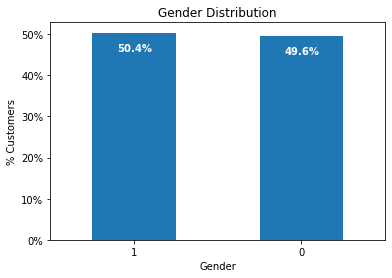

In [31]:
ax = (train['gender'].value_counts()*100.0/len(train)).plot.bar(rot = 0, stacked = True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []

for i in ax.patches:
    totals.append(i.get_width())
    
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-4.5,str(round((i.get_height()/total), 1))+'%', fontsize=10, color='white',
            weight = 'bold')

**Senior Citizen :**

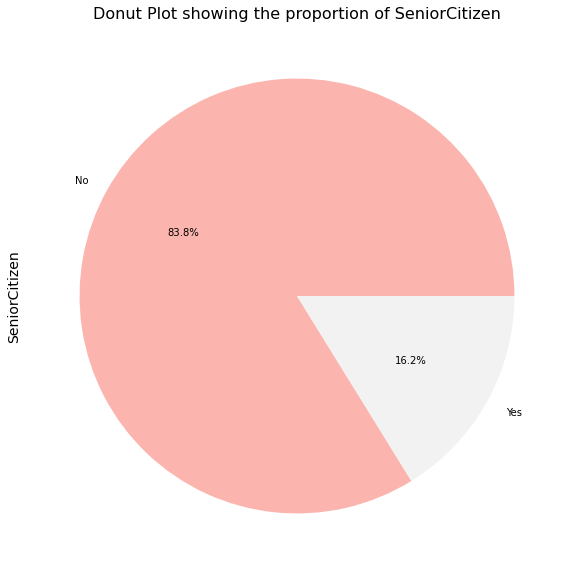

In [32]:
figure = plt.figure(figsize=[10, 10])

train['SeniorCitizen'].value_counts().plot.pie(autopct='%3.1f%%',labels = ['No', 'Yes'] ,cmap = 'Pastel1')

plt.ylabel(ylabel='SeniorCitizen', size=14)
plt.title(label='Donut Plot showing the proportion of SeniorCitizen', size=16)
plt.show()

**Customer tenure information :**

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customers by their tenure')

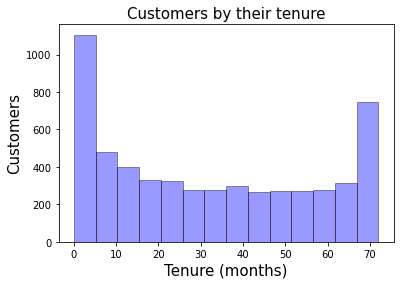

In [33]:
ax = sns.distplot(train['tenure'], hist=True, kde=False,  color = 'blue',  hist_kws={'edgecolor':'black'})
ax.set_ylabel('Customers', size = 15)
ax.set_xlabel('Tenure (months)', size = 15)
ax.set_title('Customers by their tenure', size = 15)

**Contracts :**

Text(0.5, 1.0, 'Customers by Contract Type')

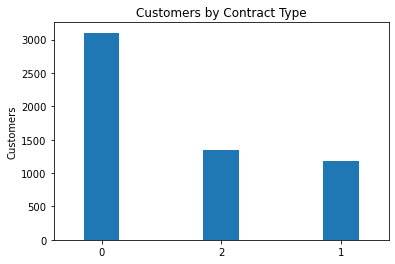

In [34]:
ax = train['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Customers')
ax.set_title('Customers by Contract Type')

**Relation between monthly charges and total charges :**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

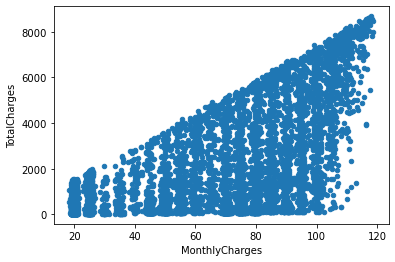

In [35]:
train_df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges')

**Train Test Split :**

In [36]:
x = train_df.iloc[:, 1:20]
y = train_df['Churn']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4507, 19)
(1127, 19)
(4507,)
(1127,)


**Logistic Regression :**

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()

In [42]:
lr.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred_train = lr.predict(x_train)

In [44]:
y_pred_train

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [45]:
#Predicting on test data
y_pred_test = lr.predict(x_test)

In [46]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Checking Accuracy score, Confusion matrix and Classification :**

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [48]:
def model_eval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [49]:
model_eval(y_train, y_pred_train)

[[2962  341]
 [ 542  662]]
The accuracy of the Model is : 0.8040825382737963
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3303
           1       0.66      0.55      0.60      1204

    accuracy                           0.80      4507
   macro avg       0.75      0.72      0.74      4507
weighted avg       0.80      0.80      0.80      4507



In [50]:
model_eval(y_test, y_pred_test)

[[716  94]
 [150 167]]
The accuracy of the Model is : 0.7834960070984915
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       810
           1       0.64      0.53      0.58       317

    accuracy                           0.78      1127
   macro avg       0.73      0.71      0.72      1127
weighted avg       0.77      0.78      0.78      1127



In [124]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [125]:
test['gender'] = le.fit_transform(test['gender'])
test['Partner'] = le.fit_transform(test['Partner'])
test['Dependents'] = le.fit_transform(test['Dependents'])
test['PhoneService'] = le.fit_transform(test['PhoneService'])
test['MultipleLines'] = le.fit_transform(test['MultipleLines'])
test['InternetService'] = le.fit_transform(test['InternetService'])
test['OnlineSecurity'] = le.fit_transform(test['OnlineSecurity'])
test['OnlineBackup'] = le.fit_transform(test['OnlineBackup'])
test['DeviceProtection'] = le.fit_transform(test['DeviceProtection'])
test['TechSupport'] = le.fit_transform(test['TechSupport'])
test['StreamingTV'] = le.fit_transform(test['StreamingTV'])
test['StreamingMovies'] = le.fit_transform(test['StreamingMovies'])
test['Contract'] = le.fit_transform(test['Contract'])
test['PaperlessBilling'] = le.fit_transform(test['PaperlessBilling'])
test['PaymentMethod'] = le.fit_transform(test['PaymentMethod'])

In [126]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   int32  
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   int32  
 4   Dependents        1409 non-null   int32  
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   int32  
 7   MultipleLines     1409 non-null   int32  
 8   InternetService   1409 non-null   int32  
 9   OnlineSecurity    1409 non-null   int32  
 10  OnlineBackup      1409 non-null   int32  
 11  DeviceProtection  1409 non-null   int32  
 12  TechSupport       1409 non-null   int32  
 13  StreamingTV       1409 non-null   int32  
 14  StreamingMovies   1409 non-null   int32  
 15  Contract          1409 non-null   int32  
 16  PaperlessBilling  1409 non-null   int32  


In [127]:
test.TotalCharges = pd.to_numeric(test.TotalCharges, errors='coerce')
test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [128]:
test['TotalCharges'] = np.where(test['TotalCharges'].isna(), test['TotalCharges'].median(skipna = True), test['TotalCharges'])

In [129]:
test_1 = test.iloc[:, 1:]

In [132]:
predicted_test = lr.predict(test_1)

In [133]:
predicted_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [134]:
test['Churn_Status'] = predicted_test

In [135]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Status
0,8879-ZKJOF,0,0,0,0,41,1,0,0,2,...,2,2,2,2,1,1,0,79.85,3320.75,0
1,0201-MIBOL,0,1,0,0,66,1,2,1,2,...,0,0,2,2,2,1,0,102.40,6471.85,0
2,1600-DILPE,0,0,0,0,12,1,0,0,0,...,0,0,0,0,0,1,0,45.00,524.35,0
3,8601-QACRS,0,0,0,0,5,1,2,0,0,...,0,0,0,0,0,1,3,50.60,249.95,1
4,7919-ZODZZ,0,0,1,1,10,1,0,0,0,...,2,0,0,2,1,1,3,65.90,660.05,0


In [136]:
test['Churn_Status'] = np.where(test['Churn_Status']==1, 'Yes', 'No')

In [137]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Status
0,8879-ZKJOF,0,0,0,0,41,1,0,0,2,...,2,2,2,2,1,1,0,79.85,3320.75,No
1,0201-MIBOL,0,1,0,0,66,1,2,1,2,...,0,0,2,2,2,1,0,102.40,6471.85,No
2,1600-DILPE,0,0,0,0,12,1,0,0,0,...,0,0,0,0,0,1,0,45.00,524.35,No
3,8601-QACRS,0,0,0,0,5,1,2,0,0,...,0,0,0,0,0,1,3,50.60,249.95,Yes
4,7919-ZODZZ,0,0,1,1,10,1,0,0,0,...,2,0,0,2,1,1,3,65.90,660.05,No


In [138]:
test.to_csv('SUB_test.csv', index = False, header = False)